<a href="https://colab.research.google.com/github/Ruwai/DS-Unit-1-Sprint-2-Data-Wrangling/blob/master/module1-scrape-and-process-data/LS_DS_121_Scrape_and_process_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Scrape and process data

Objectives
- scrape and parse web pages
- use list comprehensions
- select rows and columns with pandas

Links
-  [Automate the Boring Stuff with Python, Chapter 11](https://automatetheboringstuff.com/chapter11/)
  - Requests
  - Beautiful Soup
- [Python List Comprehensions: Explained Visually](https://treyhunner.com/2015/12/python-list-comprehensions-now-in-color/)
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
  - Subset Observations (Rows)
  - Subset Variables (Columns)
- Python Data Science Handbook
  - [Chapter 3.1](https://jakevdp.github.io/PythonDataScienceHandbook/03.01-introducing-pandas-objects.html), Introducing Pandas Objects
  - [Chapter 3.2](https://jakevdp.github.io/PythonDataScienceHandbook/03.02-data-indexing-and-selection.html), Data Indexing and Selection


## Scrape the titles of PyCon 2018 talks

In [0]:
url = 'https://us.pycon.org/2018/schedule/talks/list/'

In [0]:
import requests, bs4

In [0]:
result = requests.get(url)

In [8]:
result

<Response [200]>

In [6]:
type(result)

requests.models.Response

In [7]:
result.text

'<!doctype html>\n<html>\n\r\n<!-- Mirrored from us.pycon.org/2018/schedule/talks/list/ by HTTrack Website Copier/3.x [XR&CO\'2014], Tue, 10 Jul 2018 13:45:12 GMT -->\r\n<!-- Added by HTTrack --><meta http-equiv="content-type" content="text/html;charset=utf-8" /><!-- /Added by HTTrack -->\r\n<head>\n\n\n\n\n\n\n\n\n\n\n\n\n<title>Talks | PyCon 2018 in Cleveland, Ohio</title>\n\n    <meta name="viewport" content="width=device-width, initial-scale=1">\n\n    <link href="https://fonts.googleapis.com/css?family=Montserrat:300,400,500,600,900" rel="stylesheet">\n    <link rel="stylesheet" type="text/css" media="all" href="/2018/site_media/static/css/slight.a3c1b1430280.css"/>\n    \n\n\n<link rel="stylesheet" type="text/css" href="//ajax.googleapis.com/ajax/libs/jqueryui/1.10.4/themes/smoothness/jquery-ui.css" />\n<link rel="stylesheet" href="/2018/site_media/static/cache/css/411162ab63b1.css" type="text/css" />\n\n    \n    <link rel="stylesheet" type="text/css" media="all" href="/2018/sit

In [0]:
soup = bs4.BeautifulSoup(result.text)

In [0]:
soup

In [11]:
type(soup)

bs4.BeautifulSoup

In [0]:
soup.select('h2')

In [14]:
first = soup.select('h2')[0]
first

<h2>
<a href="/2018/schedule/presentation/127/" id="presentation-127">
        A Bit about Bytes: Understanding Python Bytecode
      </a>
</h2>

In [17]:
type(first.text)

str

In [18]:
first.text.strip()

'A Bit about Bytes: Understanding Python Bytecode'

In [21]:
last = soup.select('h2')[-1]
last

<h2>
<a href="/2018/schedule/presentation/80/" id="presentation-80">
        You're an expert. Here's how to teach like one.
      </a>
</h2>

In [22]:
type(last)

bs4.element.Tag

In [23]:
titles = []
for tag in soup.select('h2'):
  tag.text.strip()
  titles.append(titles)
  
titles = [tag.text.strip()
          for tag in soup.select('h2')]

type(titles), len(titles)

(list, 95)

In [24]:
titles[0], titles[-1]

('A Bit about Bytes: Understanding Python Bytecode',
 "You're an expert. Here's how to teach like one.")

## 5 ways to look at long titles

Let's define a long title as greater than 80 characters

### 1. For Loop

In [26]:
long_titles = []
for title in titles:
  if len(title) > 80:
    long_titles.append(title)
    
long_titles

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 2. List Comprehension

In [27]:
[title for title in titles
if len(title) > 80]

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 3. Filter with named function

In [28]:
def long(title):
  return len(title) > 80
list(filter(long,titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 4. Filter with anonymous function

In [30]:
list(filter(lambda t: len(t)>80, titles))

['Code like an accountant: Designing data systems for accuracy, resilience and auditability',
 'Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus',
 'How we designed an inclusivity-first conference on a shoestring budget and short timeline',
 'Listen, Attend, and Walk : Interpreting natural language navigational instructions',
 'The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications']

### 5. Pandas

pandas documentation: [Working with Text Data](https://pandas.pydata.org/pandas-docs/stable/text.html)

In [31]:
import pandas as pd
pd.options.display.max_colwidth = 200

df = pd.DataFrame({'title': titles})
df[df.title.str.len() > 80]

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


In [32]:
condition = df['title'].str.len() > 80
df[condition]

,title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability"
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions"
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications


In [33]:
len(df.title)

95

In [34]:
df.title.str.len()

0      48
1      43
2      48
3      69
4      59
5      50
6      23
7      59
8      22
9      80
10     56
11     35
12     40
13     74
14     49
15     45
16     26
17     52
18     56
19     89
20     42
21     24
22     52
23     66
24     33
25     40
26     59
27     47
28    100
29     37
     ... 
65     35
66     43
67     60
68     30
69     32
70     25
71     56
72     37
73     34
74     49
75     50
76     19
77     14
78     84
79     40
80     34
81     37
82     74
83     57
84     40
85     37
86     38
87     23
88     65
89     56
90     38
91     32
92     64
93     38
94     47
Name: title, Length: 95, dtype: int64

## Make new dataframe columns

pandas documentation: [apply](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html)

In [0]:
df['title length'] = df.title.apply(len)

In [38]:
df.head()

,title,title length
0,A Bit about Bytes: Understanding Python Bytecode,48
1,Adapting from Spark to Dask: what to expect,43
2,All in the timing: How side channel attacks work,48
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69
4,A practical guide to Singular Value Decomposition in Python,59


In [0]:
df['long title'] = df['title length'] > 80

In [40]:
df[df['long title']==True]

,title,title length,long title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability",89,True
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus,100,True
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline,89,True
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions",82,True
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications,84,True


In [44]:
df[df['long title']]

,title,title length,long title
19,"Code like an accountant: Designing data systems for accuracy, resilience and auditability",89,True
28,Debugging PySpark -- Or trying to make sense of a JVM stack trace when you were minding your own bus,100,True
46,How we designed an inclusivity-first conference on a shoestring budget and short timeline,89,True
51,"Listen, Attend, and Walk : Interpreting natural language navigational instructions",82,True
78,The Hare Wins the Race: Getting the most out of RabbitMQ in distributed applications,84,True


In [0]:
df['first letter'] = df.title.str[0]

In [46]:
df[df['first letter']=='P']

,title,title length,long title,first letter
55,Performance Python: Seven Strategies for Optimizing Your Numerical Code,71,False,P
56,Pipenv: The Future of Python Dependency Management,50,False,P
57,Practical Sphinx,16,False,P
58,Programming microbes using Python,33,False,P
59,Pumping up Python modules using Rust,36,False,P
60,Python 2 to 3: How to Upgrade and What Features to Start Using,62,False,P
61,Python 3: ten years later,25,False,P
62,Python across the USA: This is the Bus.,39,False,P
63,Python Data Sonification for Science and Discovery,50,False,P
64,Python for the quantum computing age,36,False,P


### title length

### long title

### first letter

### word count

Using [`textstat`](https://github.com/shivam5992/textstat)

In [47]:
!pip install textstat

    100% |████████████████████████████████| 3.0MB 9.2MB/s 
  Running setup.py bdist_wheel for textstat ... - done
  Stored in directory: /root/.cache/pip/wheels/04/ac/d7/a05c0ad7825899f11eacd5f9a5a78534808c8159281e65863c
Successfully built textstat


In [0]:
import textstat

In [50]:
first = df.title.values[0]
last = df.title.values[-1]

first,last

('A Bit about Bytes: Understanding Python Bytecode',
 "You're an expert. Here's how to teach like one.")

In [51]:
textstat.lexicon_count(first), textstat.lexicon_count(last)

(7, 9)

In [0]:
df['title word count'] = df.title.apply(textstat.lexicon_count)

In [53]:
df[df['title word count'] <= 3]

,title,title length,long title,first letter,title word count
6,Automating Code Quality,23,False,A,3
8,Behavior-Driven Python,22,False,B,2
21,Coding through Adversity,24,False,C,3
52,Love your bugs,14,False,L,3
57,Practical Sphinx,16,False,P,2
76,Taking Django Async,19,False,T,3


## Rename column

`title length` --> `title character count`

pandas documentation: [rename](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rename.html)

In [0]:
df = df.rename(columns={'title length': 'title character count'})

In [55]:
df.columns

Index(['title', 'title character count', 'long title', 'first letter',
       'title word count'],
      dtype='object')

## Analyze the dataframe

### Describe

pandas documentation: [describe](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

In [56]:
df.describe()

,title character count,title word count
count,95.000000,95.000000
mean,46.442105,7.189474
std,17.560664,2.903757
min,14.000000,2.000000
25%,35.000000,5.000000
50%,45.000000,7.000000
75%,56.000000,9.000000
max,100.000000,19.000000


### Sort values

pandas documentation: [sort_values](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html)

Five shortest titles, by character count

In [57]:
df.describe(include='all')

,title,title character count,long title,first letter,title word count
count,95,95.000000,95,95,95.000000
unique,95,NaN,2,21,NaN
top,Augmenting Human Decision Making with Data Science,NaN,False,P,NaN
freq,1,NaN,90,12,NaN
mean,NaN,46.442105,NaN,NaN,7.189474
std,NaN,17.560664,NaN,NaN,2.903757
min,NaN,14.000000,NaN,NaN,2.000000
25%,NaN,35.000000,NaN,NaN,5.000000
50%,NaN,45.000000,NaN,NaN,7.000000
75%,NaN,56.000000,NaN,NaN,9.000000


Titles sorted reverse alphabetically

In [58]:
import numpy as np 
df.describe(exclude=np.number)

,title,long title,first letter
count,95,95,95
unique,95,2,21
top,Augmenting Human Decision Making with Data Science,False,P
freq,1,90,12


### Get value counts

pandas documentation: [value_counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)


Frequency counts of first letters

In [59]:
df.sort_values(by='title character count').head(5)

,title,title character count,long title,first letter,title word count
52,Love your bugs,14,False,L,3
77,The AST and Me,14,False,T,4
57,Practical Sphinx,16,False,P,2
76,Taking Django Async,19,False,T,3
44,HOWTO Write a Function,22,False,H,4


Percentage of talks with long titles

In [0]:
df['first letter'] = df['first letter'].str.upper()

In [64]:
df.sort_values(by='first letter', ascending=False)

,title,title character count,long title,first letter,title word count
94,You're an expert. Here's how to teach like one.,47,False,Y,9
93,Win back lovely API: GraphQL in Python,38,False,W,7
91,What is a Python Core Developer?,32,False,W,6
90,Visual Testing with PyCharm and pytest,38,False,V,6
89,Visualizing Algorithms with Python and Programmable LEDs,56,False,V,7
88,Using Python to build an AI to play and win SNES StreetFighter II,65,False,U,13
87,User focused API Design,23,False,U,4
81,The Journey Over the Intermediate Gap,37,False,T,6
76,Taking Django Async,19,False,T,3
77,The AST and Me,14,False,T,4


In [65]:
df['first letter'].value_counts()

P    12
B    11
T    11
C     8
D     7
A     7
S     6
H     5
E     5
R     3
F     3
L     3
I     2
W     2
V     2
O     2
U     2
G     2
"     1
Y     1
Name: first letter, dtype: int64

In [66]:
df['long title'].value_counts() / len(df) * 100

False    94.736842
True      5.263158
Name: long title, dtype: float64

In [67]:
df['long title'].value_counts(normalize=True)*100

False    94.736842
True      5.263158
Name: long title, dtype: float64

### Plot

pandas documentation: [Visualization](https://pandas.pydata.org/pandas-docs/stable/visualization.html)





Top 5 most frequent first letters

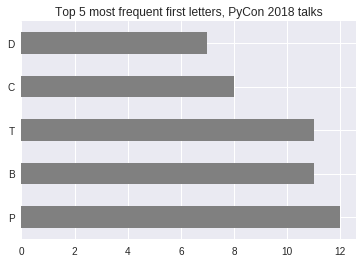

In [68]:
%matplotlib inline
(df['first letter']
 .value_counts()
 .head(5)
 .plot
 .barh(color='grey', 
       title='Top 5 most frequent first letters, PyCon 2018 talks'));

Histogram of title lengths, in characters

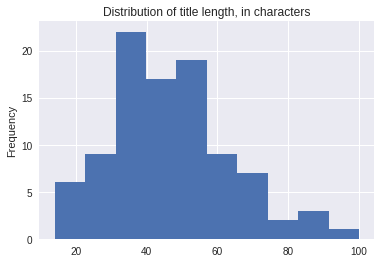

In [69]:
title = 'Distribution of title length, in characters'
df['title character count'].plot.hist(title=title);

# Assignment

**Scrape** the talk descriptions. Hint: `soup.select('.presentation-description')`

**Make** new columns in the dataframe:
- description
- description character count
- description word count
- description grade level (use [this `textstat` function](https://github.com/shivam5992/textstat#the-flesch-kincaid-grade-level) to get the Flesh-Kincaid grade level)

**Describe** all the dataframe's columns. What's the average description word count? The minimum? The maximum?

**Answer** these questions:
- Which descriptions could fit in a tweet?

----- $$$$ check last cell $$$$ ----
---- %%%% for the work %%%% -----

- What's the distribution of grade levels? Plot a histogram.

---- #### plotted #### ----





In [0]:
descriptions = [tag.text.strip()
              for tag in soup.select('.presentation-description')]

In [0]:
descriptions

In [0]:
# [description for description in descriptions
# if description]

In [0]:
# make some dataframes

df['description'] = descriptions

In [75]:
df.head()

,title,title character count,long title,first letter,title word count,description
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin..."
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ..."
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re..."
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ..."


In [0]:
df['char count'] = df.description.apply(len)

In [77]:
df.head()

,title,title character count,long title,first letter,title word count,description,char count
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147


In [0]:
df['description word count'] = df.description.apply(textstat.lexicon_count)

In [85]:
df.head()

,title,title character count,long title,first letter,title word count,description,char count,description word count,grade level
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0


In [87]:
#describe
df.describe()

,title character count,title word count,char count,description word count,grade level
count,95.000000,95.000000,95.000000,95.000000,95.000000
mean,46.442105,7.189474,846.063158,134.578947,18.117895
std,17.560664,2.903757,450.107713,70.019082,15.835652
min,14.000000,2.000000,201.000000,35.000000,3.700000
25%,35.000000,5.000000,550.000000,91.500000,10.500000
50%,45.000000,7.000000,758.000000,119.000000,13.800000
75%,56.000000,9.000000,978.000000,149.500000,17.950000
max,100.000000,19.000000,2794.000000,436.000000,107.800000


In [0]:
df['grade level'] = df.description.apply(textstat.flesch_kincaid_grade)

In [82]:
df.head()

,title,title character count,long title,first letter,title word count,description,char count,description word count,grade level
0,A Bit about Bytes: Understanding Python Bytecode,48,False,A,7,At some point every Python programmer sees Python bytecode files -- they're those '.pyc' files Python likes to leave behind after it runs. But have you ever wondered what's really going on in thos...,440,78,7.4
1,Adapting from Spark to Dask: what to expect,43,False,A,8,"Until very recently, Apache Spark has been a de facto standard choice of a framework for batch data processing. For Python developers, diving into Spark is challenging, because it requires learnin...",881,141,14.3
2,All in the timing: How side channel attacks work,48,False,A,9,"In this talk, youâll learn about a category of security issue known as side channel attacks. Youâll be amused to see how features like automatic data compression, short-circuit execution, and ...",647,96,11.9
3,Analyzing Data: What pandas and SQL Taught Me About Taking an Average,69,False,A,12,"âSo tell me,â my manager said, âwhat is an average?â\r\n\r\nThereâs probably nothing worse than that sinking feeling when you finish an analysis, email it to your manager or client to re...",1080,178,16.0
4,A practical guide to Singular Value Decomposition in Python,59,False,A,9,"Recommender systems have become increasingly popular in recent years, and are used by some of the largest websites in the world to predict the likelihood of a user taking an action on an item. In ...",1147,188,18.0


In [84]:
#### Tweets have 280 characters
df[df['char count'] <= 280]

,title,title character count,long title,first letter,title word count,description,char count,description word count,grade level
44,HOWTO Write a Function,22,False,H,4,A function is a small chunk of code that does useful work. Your job when writing a function is to do it in a way that it easy to read. Based on over 15 years of code reviews here are some tips and...,231,49,3.7
62,Python across the USA: This is the Bus.,39,False,P,8,"For 2 years, a family of three has traveled on a converted school bus from conference to conference, building tooling for the road in Python and visiting Python families in every corner of the cou...",201,35,15.8
65,"Python, Locales and Writing Systems",35,False,P,5,"Python 3 removes a lot of the confusion around Unicode handling in Python, but that by no means fixes everything. Different locales and writing systems have unique behaviours that can trip you up....",262,45,6.8


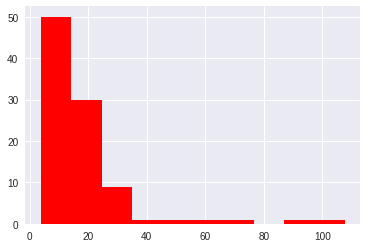

In [93]:
### PLOTTTING

%matplotlib inline

(df['grade level']
.hist(color='red'))